# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [97]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
data = pd.io.stata.read_stata('/Users/armitasafavi/Downloads/EDA_racial_discrimination/data/us_job_market_discrimination.dta')

In [99]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [100]:
data.head()


,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [101]:
w = data[data.race=='w']
b = data[data.race=='b']

In [7]:
w.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
5,b,1,4,2,6,1,0,0,0,266,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
6,b,1,4,2,5,0,1,0,0,13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [8]:
#1)What test is appropriate for this problem? Does CLT apply?
#2)What are the null and alternate hypotheses?

In [102]:
len(data)

4870

the two sample t-test to compare two population proportions would work for this problem. 
CTL also applie because observations are independent and n is larger than 10

2.What are the null and alternate hypotheses?

H0  Pw - Pb = 0
Ha  Pw - Pb ≠ 0

In [103]:
two_pop=data[['race','call']]
two_pop = two_pop.call.astype('int')

[Text(0,0.5,'Callbacks'), Text(0.5,0,'Race')]

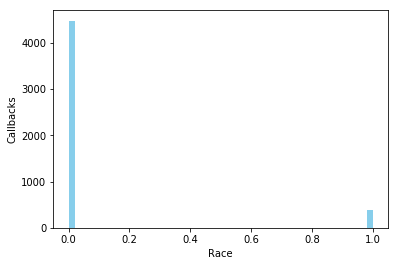

In [104]:
ax= sns.distplot(two_pop,
                 kde=False,
                 color="skyblue",
                hist_kws={"linewidth": 15,'alpha':1})
                 
ax.set(xlabel='Race', ylabel='Callbacks')

calculating population proportions

In [105]:
call_w=sum(data[data.race=='w'].call)
call_b = sum(data[data.race=='b'].call)

In [59]:
#white group callback proportion %
pw = (call_w)/len(w)
pw

0.09650924024640657

In [60]:
#Black group callback proportion %
pb = (call_b)/len(b)
pb

0.06447638603696099

In [49]:
point_estimate = pw - pb
point_estimate

0.032032854209445585

3.Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches

Bootstrap Approach

In [19]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    bs_replicates = np.empty([size])
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [20]:
w_call = w['call']
b_call = b['call']

In [95]:
def prop(array):
    a=np.asarray(array).nonzero()
    b = np.size(array)
    po =(np.size(a)/b)
    return po



bs_replicates_b = draw_bs_reps(b_call, np.mean, size=10000)
bs_replicates_w = draw_bs_reps(w_call , np.mean, size=10000)


bs_replicates = prop(bs_replicates_w - bs_replicates_b)


p = np.sum(bs_replicates >= point_estimate) / 10000
print('p-value =', p)

p-value = 0.0001


In [ ]:
p = 0.0001
alpha = 0.05

In [96]:
if p < alpha :
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


Classic Approach

In [30]:
z_score = stats.norm.ppf(q = 0.975)
z_score

1.959963984540054

In [44]:
n = len(w)

In [45]:

var_w = (pw*abs((1-pw)))/n
var_b = (pb*abs((1-pb)))/n
z = 1.96
point_estimate = abs(pb-pw)
margin_of_error = (np.sqrt((var_w/n) + (var_b/n)))*z
ci_lo, ci_hi = point_estimate - margin_of_error, point_estimate + margin_of_error

print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_lo, ',', ci_hi)

Margin of error:  0.004776392268385176
Confidence interval:  6.3463529711813065 , 6.355905755718077


In [37]:
stats.ttest_ind(w_call,b_call, equal_var=False)

Ttest_indResult(statistic=4.114705290861751, pvalue=3.942941513645935e-05)

In [54]:
alpha = 0.05
p_value=3.942941513645935e-05

In [55]:
if p_value < alpha :
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

4.Write a story describing the statistical significance in the context or the original problem.

Our findings point towards the fact that results are statisticaly significant. Meaning that there is a difference bwteen the callback for the while and black group.

5.Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

This analyis does not mean that race/name is the most important factor in getting callback. It only implies that there is a correlation between race and number of callbacks based on the difference bettween two population proportions.Low p-values don’t necessarily identify predictor features that are practically important.